In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
bank = pd.read_csv("bank-full-cleaned.csv")

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank['default'] = bank['default'].map( {'yes':1 ,'no':0}) 

In [9]:
bank['housing'] = bank['housing'].map( {'yes':1 ,'no':0}) 

In [10]:
bank['loan'] = bank['loan'].map(  {'yes':1 ,'no':0}) 

In [11]:
bank['y'] = bank['y'].map( {'yes':1 ,'no':0}) 

In [12]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [13]:
#Dropping unknow values form dataset
bank.drop(bank[bank['job'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['marital'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['education'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['default'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['housing'] == 'unknown' ].index , inplace=True)
bank.drop(bank[bank['loan'] == 'unknown' ].index , inplace=True)

In [14]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
bank.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

In [16]:
cNoLoan = len(bank[bank.y == 0])
cHaveLoan = len(bank[bank.y == 1])
print("Percentage of Customer can't Have a Loan: {:.2f}%".format((cNoLoan / (len(bank.y))*100)))
print("Percentage of Customer can Have a Loan: {:.2f}%".format((cHaveLoan / (len(bank.y))*100)))

Percentage of Customer can't Have a Loan: 88.38%
Percentage of Customer can Have a Loan: 11.62%


In [17]:
bank.groupby('y').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.669679,0.019229,1297.333176,0.587289,0.173792,15.900529,221.115949,2.838704,36.709394,0.507230
1,41.481777,0.009560,1785.043019,0.373232,0.094204,15.116710,541.191994,2.145987,68.492731,1.175065


In [18]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank[i].skew()))

Skewness age : 0.6978356364509636
Skewness duration : 3.1701799697784785
Skewness campaign : 4.7924941810208885
Skewness pdays : 2.608337543002269
Skewness previous : 42.08877792244101
Skewness balance : 8.400120937754398


In [19]:
import math
def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 10)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

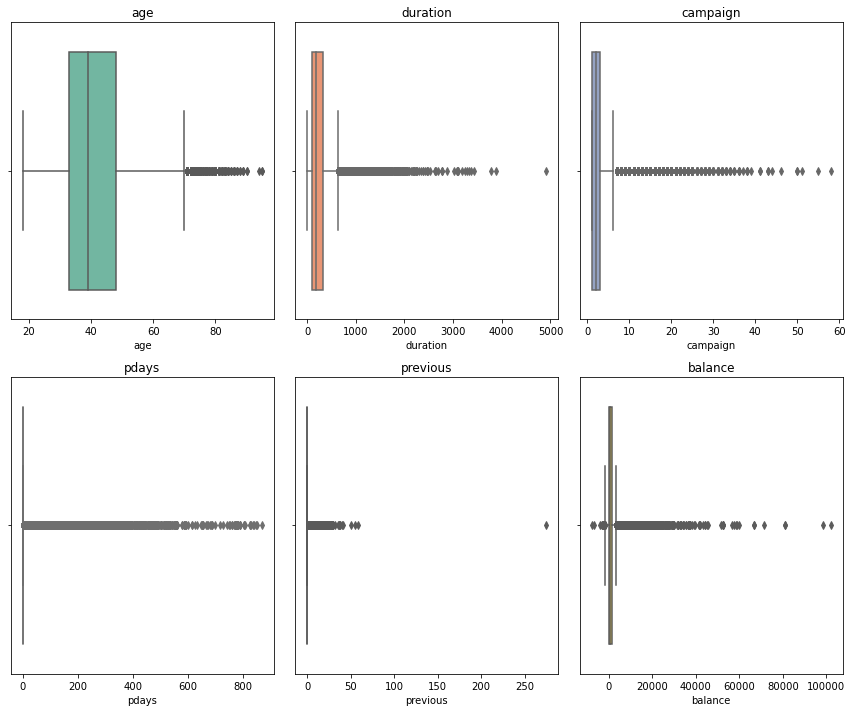

In [20]:
multiple_eda_continuous(bank, cols)

# Outlier analysis

In [21]:
# IQR score
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]
print(bank_out.shape)

age           15.0
default        0.0
balance     1341.0
housing        1.0
loan           0.0
day           13.0
duration     215.0
campaign       2.0
pdays          0.0
previous       0.0
y              0.0
dtype: float64
(20327, 17)


<ipython-input-21-7e24bc2e2e47>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-21-7e24bc2e2e47>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bank_out = bank[~((bank < (Q1 - 1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank_out[i].skew()))

Skewness age : 0.41416767090481166
Skewness duration : 1.0790034845002618
Skewness campaign : 1.1216634134080552
Skewness pdays : 0
Skewness previous : 0
Skewness balance : 1.3639638827560565


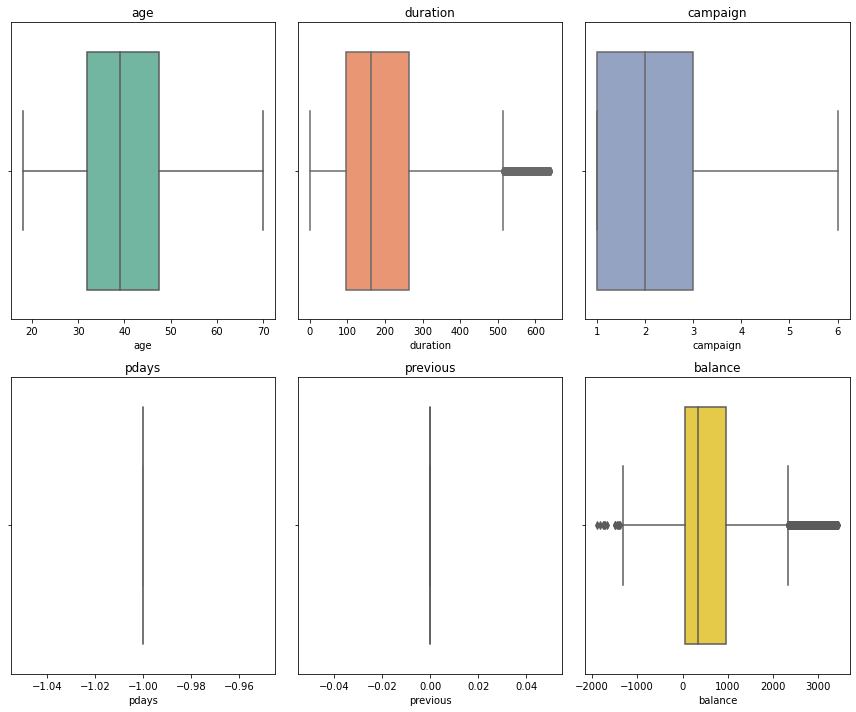

In [23]:
# Check outliers after flooring and capping using IQR
multiple_eda_continuous(bank_out, cols)

In [24]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [25]:
bank_out

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,28,services,single,tertiary,0,441,0,0,cellular,8,nov,106,1,-1,0,unknown,0
45161,31,management,married,tertiary,0,720,1,0,cellular,9,nov,94,3,-1,0,unknown,0
45167,48,admin.,married,secondary,0,178,0,0,cellular,10,nov,228,1,-1,0,unknown,0
45198,37,management,married,tertiary,0,1428,0,0,cellular,16,nov,333,2,-1,0,unknown,0


# converting text data columns using label encoder


In [26]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [27]:
month = list(bank.month)
values = array(month)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
month_list = list(integer_encoded)

In [28]:
bank.insert(loc=11, column="month_enc", value = month_list)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [29]:
job = list(bank.job)
values = array(job)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
job_list = list(integer_encoded)

In [30]:
bank.insert(loc=2, column="job_enc", value = job_list)
bank

,age,job,job_enc,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [31]:
marital = list(bank.marital)
values = array(marital)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
marital_list = list(integer_encoded)

In [32]:
bank.insert(loc=4, column="marital_enc", value = marital_list)
bank

,age,job,job_enc,marital,marital_enc,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


In [33]:
education = list(bank.education)
values = array(education)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
education_list = list(integer_encoded)

In [34]:
bank.insert(loc=6, column="education_enc", value = education_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,telephone,17,nov,9,508,4,-1,0,unknown,0


In [35]:
contact = list(bank.contact)
values = array(contact)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
contact_list = list(integer_encoded)

In [36]:
bank.insert(loc=12, column="contact_enc", value = contact_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact_enc,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,2,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,2,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,2,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,2,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,2,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,0,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,0,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,0,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,1,17,nov,9,508,4,-1,0,unknown,0


In [37]:
poutcome = list(bank.poutcome)
values = array(poutcome)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
poutcome_list = list(integer_encoded)

In [38]:
bank.insert(loc=21, column="poutcome_enc", value = poutcome_list)
bank

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,day,month,month_enc,duration,campaign,pdays,previous,poutcome,poutcome_enc,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,5,may,8,261,1,-1,0,unknown,3,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,5,may,8,151,1,-1,0,unknown,3,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,5,may,8,76,1,-1,0,unknown,3,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,5,may,8,139,1,-1,0,unknown,3,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,5,may,8,217,1,-1,0,unknown,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,17,nov,9,977,3,-1,0,unknown,3,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,17,nov,9,456,2,-1,0,unknown,3,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,17,nov,9,1127,5,184,3,success,2,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,17,nov,9,508,4,-1,0,unknown,3,0


In [39]:
bank.columns

Index(['age', 'job', 'job_enc', 'marital', 'marital_enc', 'education',
       'education_enc', 'default', 'balance', 'housing', 'loan', 'contact',
       'contact_enc', 'day', 'month', 'month_enc', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'poutcome_enc', 'y'],
      dtype='object')

In [40]:
bank = bank.drop(['job', 'marital', 'education', 'month', 'contact', 'poutcome'], axis = 1)

In [41]:
bank

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [42]:
bank.columns

Index(['age', 'job_enc', 'marital_enc', 'education_enc', 'default', 'balance',
       'housing', 'loan', 'contact_enc', 'day', 'month_enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_enc', 'y'],
      dtype='object')

# XGB classifier (Boosting algorithm)

In [43]:
!pip install xgboost

You should consider upgrading via the 'c:\users\prani\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [45]:
x=bank[bank.columns[0:16]]
x

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [46]:
y=bank["y"]
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43193, dtype: int64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# XGBoosting classifier

In [75]:
# XGBOOST MODEL
XG_classifier = XGBClassifier(random_state = 455)
XG_classifier.fit(x_train, y_train)

C:\Users\prani\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=455,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
predictions = XG_classifier.predict(x_test)

In [77]:
accuracy_score(y_test,predictions)

0.9093995987035036

In [68]:
cf = confusion_matrix(y_test,predictions)
cf

array([[11051,   394],
       [  780,   733]], dtype=int64)

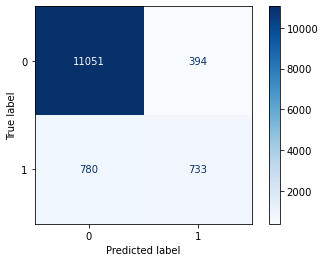

In [69]:
metrics.plot_confusion_matrix(XG_classifier, x_test, y_test,cmap=plt.cm.Blues)

In [156]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11445
           1       0.65      0.18      0.28      1513

    accuracy                           0.89     12958
   macro avg       0.77      0.58      0.61     12958
weighted avg       0.87      0.89      0.87     12958



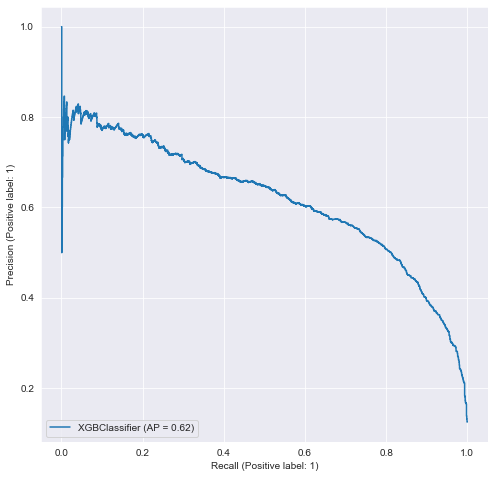

In [135]:
#XGBoosting classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(XG_classifier, x_test, y_test, ax=ax)

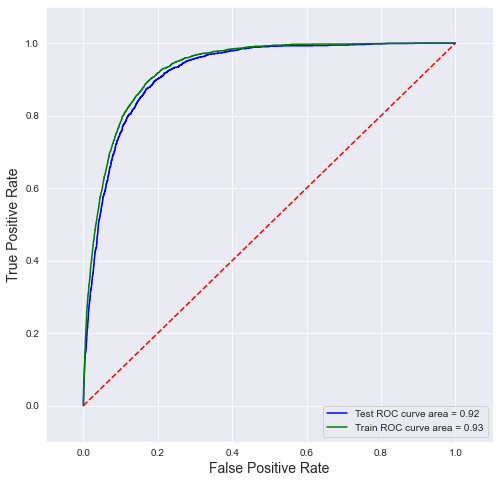

In [142]:
#XGBoosting classifier
sns.set_style('darkgrid')
preds_train = XG_classifier.predict(x_train)
# calculate prediction probability
prob_train1 = np.squeeze(XG_classifier.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test1 = np.squeeze(XG_classifier.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

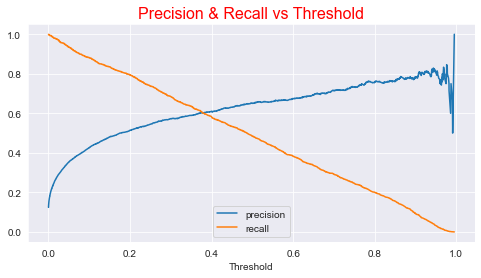

In [148]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test1)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

# Cat Boosting classifier

In [80]:
!pip install catboost

You should consider upgrading via the 'c:\users\prani\anaconda3\python.exe -m pip install --upgrade pip' command.


In [82]:
from catboost import CatBoostClassifier

cat_features = list(range(0, x.shape[1]))
print(cat_features)

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train, 
        cat_features=cat_features,  
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [119]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=500,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    x_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [120]:
predictions_clf = clf.predict(x_test)

In [121]:
accuracy_score(y_test,predictions_clf)

0.9117147707979627

In [122]:
cf = confusion_matrix(y_test,predictions_clf)
cf

array([[11106,   339],
       [  805,   708]], dtype=int64)

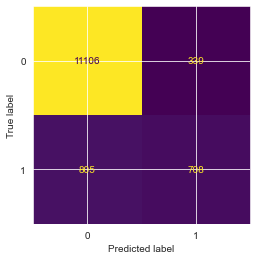

In [126]:
metrics.plot_confusion_matrix(clf, x_test, y_test,colorbar = False)

In [157]:
print(metrics.classification_report(y_test, predictions_clf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11445
           1       0.68      0.47      0.55      1513

    accuracy                           0.91     12958
   macro avg       0.80      0.72      0.75     12958
weighted avg       0.90      0.91      0.90     12958



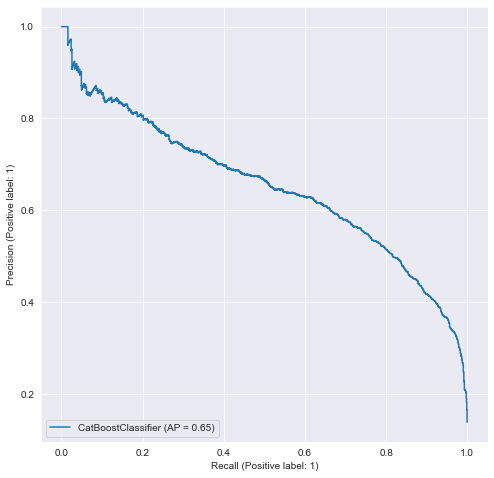

In [132]:
#cat boosting classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(clf, x_test, y_test, ax=ax)

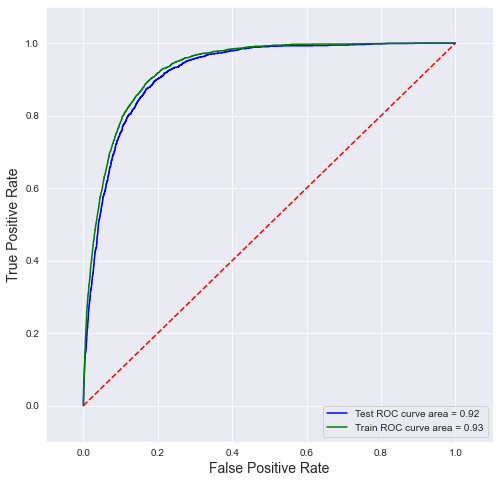

In [165]:
#cat boosting algorithm
sns.set_style('darkgrid')
preds_train = clf.predict(x_train)
# calculate prediction probability
prob_train4 = np.squeeze(clf.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test4 = np.squeeze(clf.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

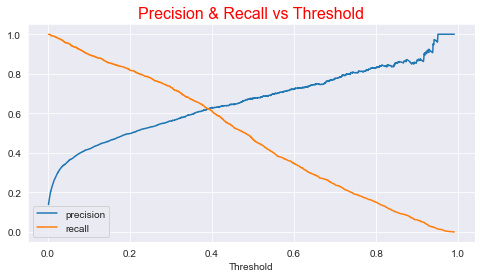

In [151]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test4)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

# Gradient Boosting classifier

In [49]:
gbmodel = GradientBoostingClassifier()
gbmodel.fit(x_train,y_train)

GradientBoostingClassifier()

In [159]:
predictions_gb = gbmodel.predict(x_test)

In [51]:
accuracy_score(y_test,predictions_gb)

0.903843185676802

In [52]:
cf = confusion_matrix(y_test,predictions_gb)
cf

array([[11117,   328],
       [  918,   595]], dtype=int64)

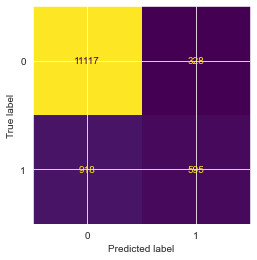

In [74]:
metrics.plot_confusion_matrix(gbmodel, x_test, y_test,colorbar = False)

In [164]:
print(metrics.classification_report(y_test, predictions_gb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.64      0.39      0.49      1513

    accuracy                           0.90     12958
   macro avg       0.78      0.68      0.72     12958
weighted avg       0.89      0.90      0.89     12958



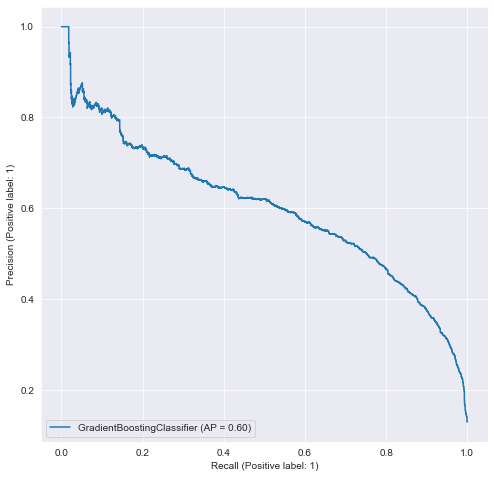

In [134]:
#gradient boosting classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(gbmodel, x_test, y_test, ax=ax)

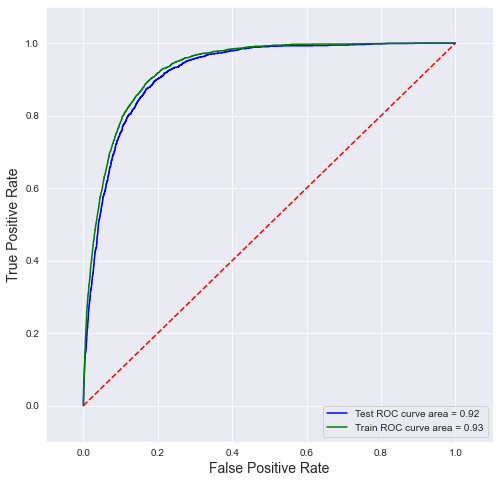

In [143]:
#gradient boosting model
sns.set_style('darkgrid')
preds_train = gbmodel.predict(x_train)
# calculate prediction probability
prob_train2 = np.squeeze(gbmodel.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test2 = np.squeeze(gbmodel.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

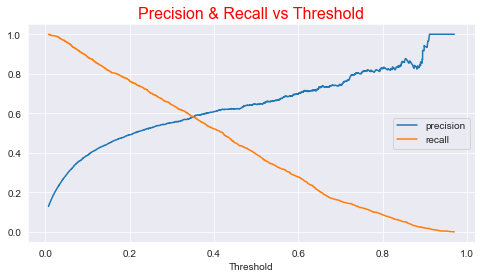

In [149]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test2)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

# Logistic regression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\prani\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
predictions_lg = logmodel.predict(x_test)

In [56]:
accuracy_score(y_test,predictions_lg)

0.8874054638061429

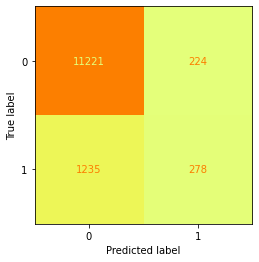

In [57]:
metrics.plot_confusion_matrix(logmodel, x_test, y_test,colorbar = False, cmap=plt.cm.Wistia)

In [163]:
print(metrics.classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11445
           1       0.55      0.18      0.28      1513

    accuracy                           0.89     12958
   macro avg       0.73      0.58      0.61     12958
weighted avg       0.86      0.89      0.86     12958



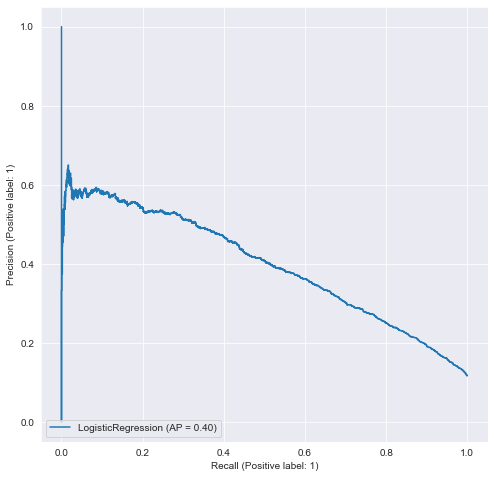

In [133]:
#logistic regression
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(logmodel, x_test, y_test, ax=ax)


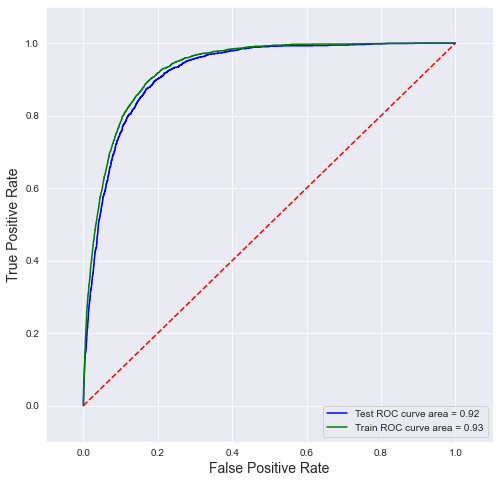

In [144]:
#logistic regression
sns.set_style('darkgrid')
preds_train = logmodel.predict(x_train)
# calculate prediction probability
prob_train3 = np.squeeze(logmodel.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(logmodel.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

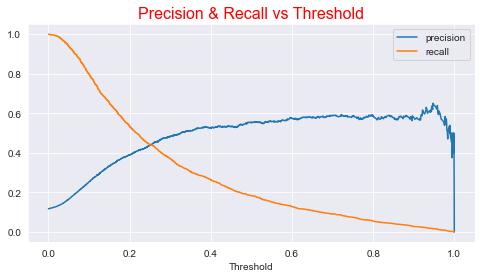

In [150]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test3)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

In [152]:
# Entropy loss_xgboosting classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test1)
cross_entropy_loss

0.205896050920936

In [153]:
# Entropy loss_gradient boosting classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test2)
cross_entropy_loss

0.2146100934291298

In [154]:
# Entropy loss_logistic regression
cross_entropy_loss = metrics.log_loss(y_test, prob_test3)
cross_entropy_loss

0.2960466440307245

In [155]:
# Entropy loss_ cat boost classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test4)
cross_entropy_loss

0.19306392792715674

In [130]:
from sklearn.metrics import log_loss, mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import  GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [131]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = GradientBoostingClassifier()
model_4 = CatBoostClassifier()
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('gb', model_3), ('cat', model_4)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
score = accuracy_score(y_test, pred_final)
score

C:\Users\prani\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prani\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.044168
0:	learn: 0.6435641	total: 24ms	remaining: 24s
1:	learn: 0.5908239	total: 53.8ms	remaining: 26.8s
2:	learn: 0.5535643	total: 83.8ms	remaining: 27.8s
3:	learn: 0.5156084	total: 113ms	remaining: 28.2s
4:	learn: 0.4831301	total: 144ms	remaining: 28.7s
5:	learn: 0.4586858	total: 176ms	remaining: 29.2s
6:	learn: 0.4375321	total: 209ms	remaining: 29.7s
7:	learn: 0.4148079	total: 240ms	remaining: 29.8s
8:	learn: 0.3969215	total: 270ms	remaining: 29.7s
9:	learn: 0.3782195	total: 302ms	remaining: 29.9s
10:	learn: 0.3629362	total: 331ms	remaining: 29.8s
11:	learn: 0.3503986	total: 362ms	remaining: 29.8s
12:	learn: 0.3373900	total: 395ms	remaining: 30s
13:	learn:

167:	learn: 0.1945728	total: 2.61s	remaining: 12.9s
168:	learn: 0.1943253	total: 2.62s	remaining: 12.9s
169:	learn: 0.1942562	total: 2.63s	remaining: 12.8s
170:	learn: 0.1941696	total: 2.64s	remaining: 12.8s
171:	learn: 0.1940719	total: 2.65s	remaining: 12.7s
172:	learn: 0.1940191	total: 2.66s	remaining: 12.7s
173:	learn: 0.1939277	total: 2.67s	remaining: 12.7s
174:	learn: 0.1938049	total: 2.68s	remaining: 12.6s
175:	learn: 0.1936315	total: 2.69s	remaining: 12.6s
176:	learn: 0.1935187	total: 2.7s	remaining: 12.5s
177:	learn: 0.1934714	total: 2.71s	remaining: 12.5s
178:	learn: 0.1933866	total: 2.71s	remaining: 12.5s
179:	learn: 0.1931705	total: 2.72s	remaining: 12.4s
180:	learn: 0.1930342	total: 2.73s	remaining: 12.4s
181:	learn: 0.1928439	total: 2.74s	remaining: 12.3s
182:	learn: 0.1927670	total: 2.75s	remaining: 12.3s
183:	learn: 0.1927078	total: 2.76s	remaining: 12.2s
184:	learn: 0.1926554	total: 2.77s	remaining: 12.2s
185:	learn: 0.1925839	total: 2.78s	remaining: 12.2s
186:	learn: 0

326:	learn: 0.1772501	total: 4.18s	remaining: 8.6s
327:	learn: 0.1771725	total: 4.19s	remaining: 8.58s
328:	learn: 0.1771686	total: 4.2s	remaining: 8.56s
329:	learn: 0.1770969	total: 4.21s	remaining: 8.54s
330:	learn: 0.1770251	total: 4.21s	remaining: 8.52s
331:	learn: 0.1768860	total: 4.22s	remaining: 8.5s
332:	learn: 0.1768201	total: 4.23s	remaining: 8.48s
333:	learn: 0.1767902	total: 4.24s	remaining: 8.46s
334:	learn: 0.1767003	total: 4.25s	remaining: 8.45s
335:	learn: 0.1766086	total: 4.26s	remaining: 8.43s
336:	learn: 0.1765659	total: 4.27s	remaining: 8.41s
337:	learn: 0.1764365	total: 4.28s	remaining: 8.39s
338:	learn: 0.1763199	total: 4.29s	remaining: 8.37s
339:	learn: 0.1762174	total: 4.3s	remaining: 8.35s
340:	learn: 0.1761286	total: 4.31s	remaining: 8.33s
341:	learn: 0.1761268	total: 4.32s	remaining: 8.31s
342:	learn: 0.1760522	total: 4.33s	remaining: 8.29s
343:	learn: 0.1759363	total: 4.34s	remaining: 8.28s
344:	learn: 0.1758531	total: 4.35s	remaining: 8.26s
345:	learn: 0.17

496:	learn: 0.1652599	total: 5.88s	remaining: 5.95s
497:	learn: 0.1651973	total: 5.89s	remaining: 5.94s
498:	learn: 0.1651156	total: 5.9s	remaining: 5.92s
499:	learn: 0.1650549	total: 5.91s	remaining: 5.91s
500:	learn: 0.1649417	total: 5.92s	remaining: 5.9s
501:	learn: 0.1648721	total: 5.93s	remaining: 5.88s
502:	learn: 0.1647743	total: 5.94s	remaining: 5.87s
503:	learn: 0.1647167	total: 5.95s	remaining: 5.86s
504:	learn: 0.1646211	total: 5.96s	remaining: 5.84s
505:	learn: 0.1645481	total: 5.97s	remaining: 5.83s
506:	learn: 0.1645003	total: 5.98s	remaining: 5.82s
507:	learn: 0.1644455	total: 5.99s	remaining: 5.8s
508:	learn: 0.1643937	total: 6s	remaining: 5.79s
509:	learn: 0.1642911	total: 6.01s	remaining: 5.78s
510:	learn: 0.1642276	total: 6.02s	remaining: 5.76s
511:	learn: 0.1641598	total: 6.03s	remaining: 5.75s
512:	learn: 0.1641133	total: 6.04s	remaining: 5.73s
513:	learn: 0.1640327	total: 6.05s	remaining: 5.72s
514:	learn: 0.1639520	total: 6.06s	remaining: 5.71s
515:	learn: 0.1638

674:	learn: 0.1546339	total: 7.6s	remaining: 3.66s
675:	learn: 0.1545906	total: 7.61s	remaining: 3.65s
676:	learn: 0.1545483	total: 7.62s	remaining: 3.63s
677:	learn: 0.1545220	total: 7.63s	remaining: 3.62s
678:	learn: 0.1544547	total: 7.64s	remaining: 3.61s
679:	learn: 0.1544162	total: 7.65s	remaining: 3.6s
680:	learn: 0.1543523	total: 7.66s	remaining: 3.58s
681:	learn: 0.1543305	total: 7.66s	remaining: 3.57s
682:	learn: 0.1543232	total: 7.67s	remaining: 3.56s
683:	learn: 0.1543100	total: 7.68s	remaining: 3.55s
684:	learn: 0.1542534	total: 7.69s	remaining: 3.54s
685:	learn: 0.1542191	total: 7.7s	remaining: 3.52s
686:	learn: 0.1541364	total: 7.71s	remaining: 3.51s
687:	learn: 0.1540749	total: 7.71s	remaining: 3.5s
688:	learn: 0.1540406	total: 7.72s	remaining: 3.49s
689:	learn: 0.1540055	total: 7.73s	remaining: 3.47s
690:	learn: 0.1539475	total: 7.74s	remaining: 3.46s
691:	learn: 0.1538971	total: 7.75s	remaining: 3.45s
692:	learn: 0.1538535	total: 7.76s	remaining: 3.44s
693:	learn: 0.15

844:	learn: 0.1467927	total: 9.11s	remaining: 1.67s
845:	learn: 0.1467821	total: 9.12s	remaining: 1.66s
846:	learn: 0.1467314	total: 9.13s	remaining: 1.65s
847:	learn: 0.1466971	total: 9.14s	remaining: 1.64s
848:	learn: 0.1466496	total: 9.15s	remaining: 1.63s
849:	learn: 0.1466100	total: 9.16s	remaining: 1.62s
850:	learn: 0.1465697	total: 9.17s	remaining: 1.6s
851:	learn: 0.1465184	total: 9.18s	remaining: 1.59s
852:	learn: 0.1464708	total: 9.18s	remaining: 1.58s
853:	learn: 0.1464165	total: 9.19s	remaining: 1.57s
854:	learn: 0.1463484	total: 9.2s	remaining: 1.56s
855:	learn: 0.1462974	total: 9.21s	remaining: 1.55s
856:	learn: 0.1462544	total: 9.22s	remaining: 1.54s
857:	learn: 0.1462005	total: 9.23s	remaining: 1.53s
858:	learn: 0.1461335	total: 9.24s	remaining: 1.52s
859:	learn: 0.1460302	total: 9.25s	remaining: 1.5s
860:	learn: 0.1459853	total: 9.26s	remaining: 1.49s
861:	learn: 0.1459692	total: 9.27s	remaining: 1.48s
862:	learn: 0.1459307	total: 9.27s	remaining: 1.47s
863:	learn: 0.1

0.9046149097082883

In [119]:
np.array_equal(final_model.named_estimators_.lr.predict(x),final_model.named_estimators_['lr'].predict(x))

True

In [136]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = GradientBoostingClassifier()
model_4 = CatBoostClassifier()
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('gb', model_3), ('cat', model_4)], voting='soft')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
score = accuracy_score(y_test, pred_final)
score

C:\Users\prani\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prani\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.044168
0:	learn: 0.6435641	total: 13.3ms	remaining: 13.2s
1:	learn: 0.5908239	total: 29.3ms	remaining: 14.6s
2:	learn: 0.5535643	total: 44.1ms	remaining: 14.7s
3:	learn: 0.5156084	total: 56.1ms	remaining: 14s
4:	learn: 0.4831301	total: 66.4ms	remaining: 13.2s
5:	learn: 0.4586858	total: 77.7ms	remaining: 12.9s
6:	learn: 0.4375321	total: 87.9ms	remaining: 12.5s
7:	learn: 0.4148079	total: 97.7ms	remaining: 12.1s
8:	learn: 0.3969215	total: 111ms	remaining: 12.3s
9:	learn: 0.3782195	total: 125ms	remaining: 12.4s
10:	learn: 0.3629362	total: 138ms	remaining: 12.4s
11:	learn: 0.3503986	total: 151ms	remaining: 12.4s
12:	learn: 0.3373900	total: 163ms	remaining: 12.4s
1

169:	learn: 0.1942562	total: 1.72s	remaining: 8.38s
170:	learn: 0.1941696	total: 1.73s	remaining: 8.37s
171:	learn: 0.1940719	total: 1.74s	remaining: 8.37s
172:	learn: 0.1940191	total: 1.75s	remaining: 8.35s
173:	learn: 0.1939277	total: 1.76s	remaining: 8.34s
174:	learn: 0.1938049	total: 1.77s	remaining: 8.33s
175:	learn: 0.1936315	total: 1.78s	remaining: 8.33s
176:	learn: 0.1935187	total: 1.79s	remaining: 8.32s
177:	learn: 0.1934714	total: 1.8s	remaining: 8.31s
178:	learn: 0.1933866	total: 1.81s	remaining: 8.3s
179:	learn: 0.1931705	total: 1.82s	remaining: 8.28s
180:	learn: 0.1930342	total: 1.83s	remaining: 8.27s
181:	learn: 0.1928439	total: 1.84s	remaining: 8.26s
182:	learn: 0.1927670	total: 1.85s	remaining: 8.25s
183:	learn: 0.1927078	total: 1.86s	remaining: 8.24s
184:	learn: 0.1926554	total: 1.87s	remaining: 8.23s
185:	learn: 0.1925839	total: 1.88s	remaining: 8.22s
186:	learn: 0.1925023	total: 1.89s	remaining: 8.22s
187:	learn: 0.1923970	total: 1.9s	remaining: 8.21s
188:	learn: 0.1

341:	learn: 0.1761268	total: 3.44s	remaining: 6.62s
342:	learn: 0.1760522	total: 3.45s	remaining: 6.61s
343:	learn: 0.1759363	total: 3.46s	remaining: 6.6s
344:	learn: 0.1758531	total: 3.47s	remaining: 6.59s
345:	learn: 0.1758213	total: 3.48s	remaining: 6.58s
346:	learn: 0.1757677	total: 3.49s	remaining: 6.57s
347:	learn: 0.1756460	total: 3.5s	remaining: 6.56s
348:	learn: 0.1755191	total: 3.51s	remaining: 6.55s
349:	learn: 0.1754368	total: 3.52s	remaining: 6.54s
350:	learn: 0.1753379	total: 3.53s	remaining: 6.53s
351:	learn: 0.1752860	total: 3.54s	remaining: 6.52s
352:	learn: 0.1751899	total: 3.55s	remaining: 6.51s
353:	learn: 0.1751394	total: 3.56s	remaining: 6.5s
354:	learn: 0.1751317	total: 3.57s	remaining: 6.49s
355:	learn: 0.1749238	total: 3.58s	remaining: 6.48s
356:	learn: 0.1748358	total: 3.59s	remaining: 6.47s
357:	learn: 0.1748258	total: 3.6s	remaining: 6.46s
358:	learn: 0.1747574	total: 3.61s	remaining: 6.45s
359:	learn: 0.1746431	total: 3.62s	remaining: 6.43s
360:	learn: 0.17

511:	learn: 0.1641598	total: 5.13s	remaining: 4.89s
512:	learn: 0.1641133	total: 5.14s	remaining: 4.88s
513:	learn: 0.1640327	total: 5.15s	remaining: 4.87s
514:	learn: 0.1639520	total: 5.16s	remaining: 4.86s
515:	learn: 0.1638447	total: 5.17s	remaining: 4.85s
516:	learn: 0.1638051	total: 5.18s	remaining: 4.84s
517:	learn: 0.1636940	total: 5.19s	remaining: 4.83s
518:	learn: 0.1636299	total: 5.2s	remaining: 4.82s
519:	learn: 0.1635471	total: 5.21s	remaining: 4.81s
520:	learn: 0.1635004	total: 5.22s	remaining: 4.8s
521:	learn: 0.1634498	total: 5.23s	remaining: 4.79s
522:	learn: 0.1633687	total: 5.24s	remaining: 4.78s
523:	learn: 0.1633089	total: 5.25s	remaining: 4.77s
524:	learn: 0.1632941	total: 5.26s	remaining: 4.76s
525:	learn: 0.1632511	total: 5.27s	remaining: 4.75s
526:	learn: 0.1632044	total: 5.28s	remaining: 4.74s
527:	learn: 0.1631663	total: 5.29s	remaining: 4.72s
528:	learn: 0.1630851	total: 5.3s	remaining: 4.71s
529:	learn: 0.1629727	total: 5.31s	remaining: 4.71s
530:	learn: 0.1

680:	learn: 0.1543523	total: 6.82s	remaining: 3.19s
681:	learn: 0.1543305	total: 6.83s	remaining: 3.18s
682:	learn: 0.1543232	total: 6.84s	remaining: 3.17s
683:	learn: 0.1543100	total: 6.85s	remaining: 3.16s
684:	learn: 0.1542534	total: 6.86s	remaining: 3.15s
685:	learn: 0.1542191	total: 6.87s	remaining: 3.14s
686:	learn: 0.1541364	total: 6.88s	remaining: 3.13s
687:	learn: 0.1540749	total: 6.89s	remaining: 3.12s
688:	learn: 0.1540406	total: 6.9s	remaining: 3.11s
689:	learn: 0.1540055	total: 6.91s	remaining: 3.1s
690:	learn: 0.1539475	total: 6.92s	remaining: 3.09s
691:	learn: 0.1538971	total: 6.93s	remaining: 3.08s
692:	learn: 0.1538535	total: 6.94s	remaining: 3.07s
693:	learn: 0.1538180	total: 6.95s	remaining: 3.06s
694:	learn: 0.1537349	total: 6.96s	remaining: 3.05s
695:	learn: 0.1536739	total: 6.97s	remaining: 3.04s
696:	learn: 0.1536072	total: 6.97s	remaining: 3.03s
697:	learn: 0.1535461	total: 6.99s	remaining: 3.02s
698:	learn: 0.1534692	total: 7s	remaining: 3.01s
699:	learn: 0.153

854:	learn: 0.1463484	total: 8.55s	remaining: 1.45s
855:	learn: 0.1462974	total: 8.56s	remaining: 1.44s
856:	learn: 0.1462544	total: 8.57s	remaining: 1.43s
857:	learn: 0.1462005	total: 8.58s	remaining: 1.42s
858:	learn: 0.1461335	total: 8.59s	remaining: 1.41s
859:	learn: 0.1460302	total: 8.6s	remaining: 1.4s
860:	learn: 0.1459853	total: 8.61s	remaining: 1.39s
861:	learn: 0.1459692	total: 8.62s	remaining: 1.38s
862:	learn: 0.1459307	total: 8.63s	remaining: 1.37s
863:	learn: 0.1458884	total: 8.64s	remaining: 1.36s
864:	learn: 0.1458495	total: 8.65s	remaining: 1.35s
865:	learn: 0.1458091	total: 8.66s	remaining: 1.34s
866:	learn: 0.1457811	total: 8.67s	remaining: 1.33s
867:	learn: 0.1457475	total: 8.68s	remaining: 1.32s
868:	learn: 0.1457033	total: 8.69s	remaining: 1.31s
869:	learn: 0.1456639	total: 8.69s	remaining: 1.3s
870:	learn: 0.1456227	total: 8.7s	remaining: 1.29s
871:	learn: 0.1455610	total: 8.71s	remaining: 1.28s
872:	learn: 0.1455155	total: 8.72s	remaining: 1.27s
873:	learn: 0.14

0.9081648402531255